# Importing of DATA

In [1]:
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt
plt.rc('font',size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('/Users/ghanishtaggarwal/Downloads/Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understanding the Data and Exploration

In [4]:
print(df['MultipleLines'].value_counts())
print(df['InternetService'].value_counts())
print(df['Contract'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
missing_df=pd.DataFrame()
missing_df['cols']=df.isnull().sum().keys()
missing_df['values']=df.isnull().sum().values.tolist()
missing_df[missing_df['values']>0]

,cols,values


In [7]:
df['Churn'].replace('Yes',1,inplace=True)
df['Churn'].replace('No',0,inplace=True)

In [8]:
#mapping is performed to convert string into numeric values
df['Partner']=df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents']=df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService']=df['PhoneService'].map({'Yes': 1, 'No': 0})
df['OnlineBackup']=df['OnlineBackup'].map({'Yes': 1, 'No': 0,'No internet service': 0})
df['DeviceProtection']=df['DeviceProtection'].map({'Yes': 1, 'No': 0,'No internet service': 0})
df['TechSupport']=df['TechSupport'].map({'Yes': 1, 'No': 0,'No internet service': 0})
df['StreamingMovies']=df['StreamingMovies'].map({'Yes': 1, 'No': 0,'No internet service': 0})
df['StreamingTV']=df['StreamingTV'].map({'Yes': 1, 'No': 0,'No internet service': 0})
df['OnlineSecurity']=df['OnlineSecurity'].map({'Yes': 1, 'No': 0,'No internet service': 0})
df['MultipleLines']=df['MultipleLines'].map({'Yes': 1, 'No': 0,'No phone service': 0})

In [9]:
#Features are made based on agregation
df['avg_monthly_charge'] = df.groupby('gender')['MonthlyCharges'].transform('mean')
df['avg_monthly_charge_P'] = df.groupby('Partner')['MonthlyCharges'].transform('mean')
df['avg_monthly_charge_c'] = df.groupby('Contract')['MonthlyCharges'].transform('mean')
df['avg_monthly_charge_d'] = df.groupby('gender')['Dependents'].transform('mean')
df['avg_monthly_charge_t'] = df.groupby('tenure')['MonthlyCharges'].transform('mean')
df['avg_monthly_charge_sc'] = df.groupby('SeniorCitizen')['MonthlyCharges'].transform('mean')
df['avg_monthly_charge_is'] = df.groupby('InternetService')['MonthlyCharges'].transform('mean')
df['avg_monthly_charge_pm'] = df.groupby('PaymentMethod')['MonthlyCharges'].transform('mean')

In [10]:
#Dummy variables are made
#dummy1=pd.get_dummies(df['MultipleLines'])
dummy2=pd.get_dummies(df['InternetService'])
dummy3=pd.get_dummies(df['Contract'])
dummy4=pd.get_dummies(df['PaymentMethod'])

In [11]:
df=pd.concat([df,dummy2,dummy3,dummy4],axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,avg_monthly_charge,avg_monthly_charge_P,avg_monthly_charge_c,avg_monthly_charge_d,avg_monthly_charge_t,avg_monthly_charge_sc,avg_monthly_charge_is,avg_monthly_charge_pm,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,65.204243,67.776264,66.398490,0.294725,50.485808,61.847441,58.102169,76.255814,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,0,64.327482,61.945001,65.048608,0.304360,69.644615,61.847441,58.102169,43.917060,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,64.327482,61.945001,66.398490,0.304360,57.206303,61.847441,58.102169,43.917060,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,64.327482,61.945001,65.048608,0.304360,71.245902,61.847441,58.102169,67.192649,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,65.204243,61.945001,66.398490,0.294725,57.206303,61.847441,91.500129,76.255814,0,1,0,1,0,0,0,0,1,0


In [12]:
df['OnlineSecurity'].replace('Yes',1,inplace=True)
df['OnlineSecurity'].replace('No',0,inplace=True)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,avg_monthly_charge,avg_monthly_charge_P,avg_monthly_charge_c,avg_monthly_charge_d,avg_monthly_charge_t,avg_monthly_charge_sc,avg_monthly_charge_is,avg_monthly_charge_pm,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,65.204243,67.776264,66.398490,0.294725,50.485808,61.847441,58.102169,76.255814,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,0,64.327482,61.945001,65.048608,0.304360,69.644615,61.847441,58.102169,43.917060,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,64.327482,61.945001,66.398490,0.304360,57.206303,61.847441,58.102169,43.917060,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,64.327482,61.945001,65.048608,0.304360,71.245902,61.847441,58.102169,67.192649,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,65.204243,61.945001,66.398490,0.294725,57.206303,61.847441,91.500129,76.255814,0,1,0,1,0,0,0,0,1,0


In [14]:
df['OnlineSecurity'].value_counts()

0    5024
1    2019
Name: OnlineSecurity, dtype: int64

In [15]:
df['OnlineBackup'].value_counts()

0    4614
1    2429
Name: OnlineBackup, dtype: int64

In [16]:
df['DeviceProtection'].value_counts()

0    4621
1    2422
Name: DeviceProtection, dtype: int64

In [17]:
df['TechSupport'].value_counts()

0    4999
1    2044
Name: TechSupport, dtype: int64

In [18]:
df['StreamingMovies'].value_counts()

0    4311
1    2732
Name: StreamingMovies, dtype: int64

In [19]:
df['StreamingTV'].value_counts()

0    4336
1    2707
Name: StreamingTV, dtype: int64

In [20]:
df=df.fillna(0)

In [21]:
df=df.drop(['InternetService','Contract','PaymentMethod','TotalCharges','PaperlessBilling'],axis=1)

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn,avg_monthly_charge,avg_monthly_charge_P,avg_monthly_charge_c,avg_monthly_charge_d,avg_monthly_charge_t,avg_monthly_charge_sc,avg_monthly_charge_is,avg_monthly_charge_pm,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,0,0,1,0,0,0,0,29.85,0,65.204243,67.776264,66.398490,0.294725,50.485808,61.847441,58.102169,76.255814,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,0,1,0,0,0,56.95,0,64.327482,61.945001,65.048608,0.304360,69.644615,61.847441,58.102169,43.917060,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,0,0,0,0,53.85,1,64.327482,61.945001,66.398490,0.304360,57.206303,61.847441,58.102169,43.917060,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,0,1,1,0,0,42.30,0,64.327482,61.945001,65.048608,0.304360,71.245902,61.847441,58.102169,67.192649,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,0,0,0,0,0,0,70.70,1,65.204243,61.945001,66.398490,0.294725,57.206303,61.847441,91.500129,76.255814,0,1,0,1,0,0,0,0,1,0


In [23]:
df1=df.drop(['customerID','gender','Churn'],axis=1)

In [24]:
#Scaling is performed
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
scaler = preprocessing.RobustScaler()
scaled = scaler.fit_transform(df1)

In [25]:
scaled=pd.DataFrame(scaled,columns=df1.columns)

In [26]:
scaled.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,avg_monthly_charge,avg_monthly_charge_P,avg_monthly_charge_c,avg_monthly_charge_d,avg_monthly_charge_t,avg_monthly_charge_sc,avg_monthly_charge_is,avg_monthly_charge_pm,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,1.0,0.0,-0.608696,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.745170,1.0,1.0,0.0,-1.0,-1.066164,0.0,0.0,0.930182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.108696,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.246550,0.0,0.0,-1.0,0.0,0.486698,0.0,0.0,-2.388850,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,-0.586957,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.303588,0.0,0.0,0.0,0.0,-0.521454,0.0,0.0,-2.388850,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.347826,-1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.516099,0.0,0.0,-1.0,0.0,0.616485,0.0,0.0,0.000000,1.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.586957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006440,1.0,0.0,0.0,-1.0,-0.521454,0.0,1.0,0.930182,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
scaled['Churn']=df['Churn']
target_col=['Churn']

In [28]:
# Correlation matri is formed
corr_matrix=df.corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop=[column for column in upper.columns if any(upper[column]>0.75)]

In [29]:
to_drop

['avg_monthly_charge_P',
 'avg_monthly_charge_d',
 'avg_monthly_charge_t',
 'avg_monthly_charge_sc',
 'avg_monthly_charge_is',
 'Fiber optic',
 'No',
 'Month-to-month',
 'Two year',
 'Mailed check']

In [30]:
scaled=scaled.drop(to_drop,axis=1)

# DATA Modelling and Visualisation

# LOGISTIC REGRESSION

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from yellowbrick.classifier import DiscriminationThreshold

#splitting train and test
train, test = train_test_split(scaled, test_size=0.2, random_state=17)
train_X = train.drop('Churn', axis=1)
train_Y = train['Churn']
test_X = test.drop('Churn', axis=1)
test_Y = test['Churn']

In [32]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization



cols = [column for column in train_X.columns]
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
    preds = algorithm.predict(test_X)
    return 
    

In [33]:
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                          verbose=1, warm_start=False)

In [34]:
logit.fit(train_X, train_Y)
predictions = logit.predict(test_X)

[LibLinear]

[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1030
           1       0.66      0.51      0.58       379

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy   Score :  0.7991483321504613
Area under curve :  0.7083638599277609 



/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

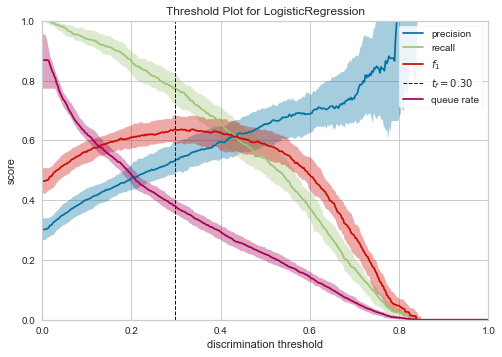

In [35]:
logit_preds = telecom_churn_prediction(logit, train_X, test_X, train_Y, test_Y,cols, "coefficients", threshold_plot=True)

# SMOTE

In [81]:
smote_X=scaled.loc[:,scaled.columns !='Churn']
smote_Y=scaled.loc[:,scaled.columns=='Churn']
cols = [col for col in train.columns if col not in ['Churn']]
from imblearn.over_sampling import SMOTE

os=SMOTE(random_state=0)
X_train,X_test,y_train,y_test=train_test_split(smote_X,smote_Y,test_size=0.2,random_state=0)
columns=X_train.columns


os_smote_train_X,os_smote_train_y=os.fit_sample(train_X,train_Y)
os_smote_X=pd.DataFrame(data=os_df1_X,columns=cols)
os_smote_y=pd.DataFrame(data=os_df1_y,columns=['Churn'])

In [83]:
from imblearn.over_sampling import SMOTE
train_os_x,train_os_y= os.fit_sample(df[cols], df['Churn'])
train_osx = pd.DataFrame(data=train_os_x, columns=cols)
train_osy = pd.DataFrame(data=train_os_y, columns=target_col)

In [84]:
#smote without train test split on scaled data
from imblearn.over_sampling import SMOTE
train_os_x, train_os_y = os.fit_sample(scaled[cols], scaled['Churn'])
train_osx_scaled = pd.DataFrame(data=train_os_x, columns=cols)
train_osy_scaled = pd.DataFrame(data=train_os_y, columns=target_col)

In [91]:
# Smote without scaling
smote_x = df.drop(columns=['Churn'])
smote_y = df['Churn']
smote_train_x,smote_test_x,smote_train_y,smote_test_y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)
os = SMOTE(random_state=0)
os_smote_train_x, os_smote_train_y = os.fit_sample(smote_train_x, smote_train_y)
os_smote_train_x = pd.DataFrame(data = os_smote_train_x,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_train_y,columns=target_col)
os_smote_test_x, os_smote_test_y = os.fit_sample(smote_test_x, smote_test_y)
os_smote_test_x = pd.DataFrame(data = os_smote_test_x,columns=cols)
os_smote_test_y = pd.DataFrame(data = os_smote_test_y,columns=target_col)

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1327
           1       0.75      0.81      0.78      1327

    accuracy                           0.77      2654
   macro avg       0.77      0.77      0.77      2654
weighted avg       0.77      0.77      0.77      2654

Accuracy   Score :  0.771665410700829
Area under curve :  0.7716654107008291 



/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



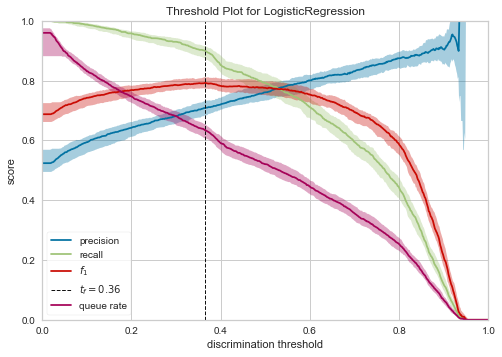

In [92]:
logit_smote = LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
                                penalty='l2', random_state=None, solver='liblinear', tol=0.001,
                                verbose=0, warm_start=False)
predictions1 = telecom_churn_prediction(logit_smote, os_smote_train_x, os_smote_test_x, os_smote_train_y, os_smote_test_y, cols, "coefficients", threshold_plot=True)

# KNN CLASSIFIER

In [93]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
    return algorithm.predict(test_X)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None,
                          n_jobs=-1, n_neighbors=5, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1030
           1       0.54      0.50      0.52       379

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.68      1409
weighted avg       0.75      0.75      0.75      1409

Accuracy Score   :  0.752306600425834
Area under curve :  0.6721559033737223


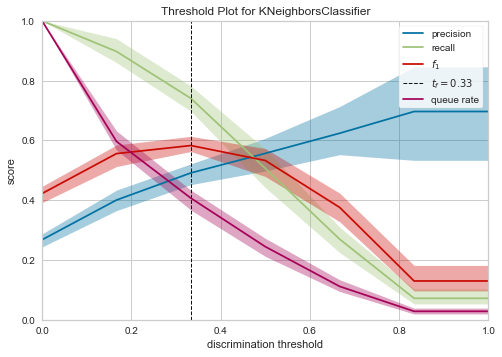

In [140]:
predictions2 = telecom_churn_prediction_alg(knn,train_X, test_X, train_Y, test_Y, threshold_plot=True)

# Decision Tree

In [141]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [142]:
#confusion matrix is printed
pred =clf_gini.predict(test_X)
from sklearn.metrics import confusion_matrix,classification_report,precision_score
print(classification_report(test_Y,pred))
print('Accuracy of Decision Tree on test set:'),accuracy_score(test_Y,pred)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1030
           1       0.67      0.35      0.46       379

    accuracy                           0.78      1409
   macro avg       0.73      0.64      0.66      1409
weighted avg       0.76      0.78      0.75      1409

Accuracy of Decision Tree on test set:


(None, 0.7785663591199432)

In [143]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot
features = list(scaled.drop(columns=['Churn']).columns)
# features

In [144]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

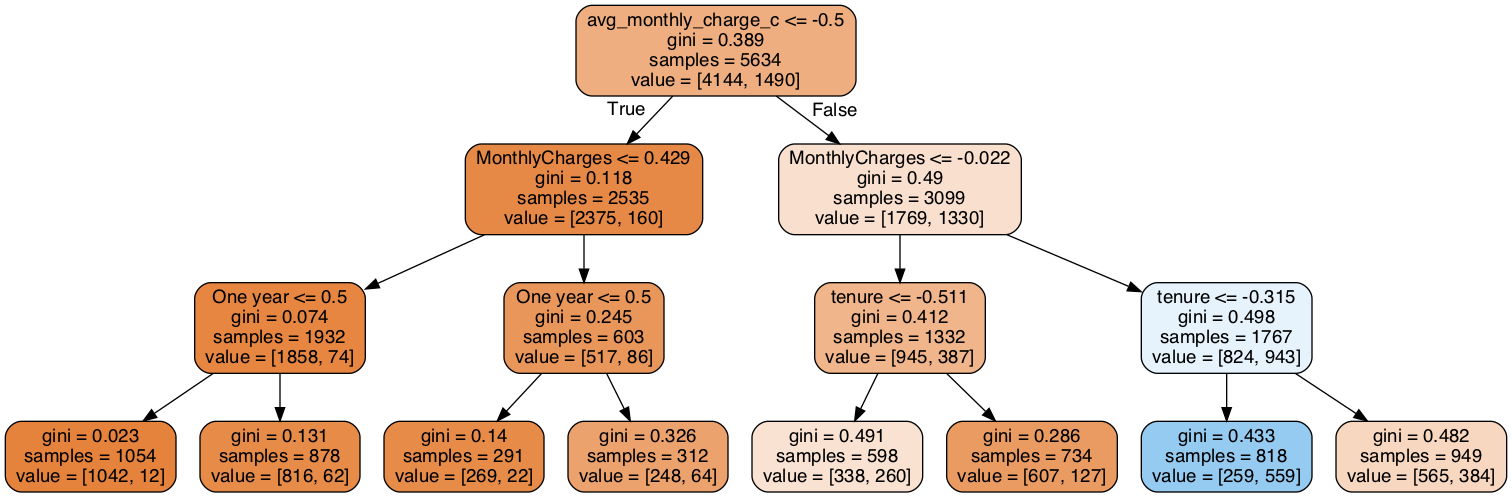

In [145]:
Image(graph[0].create_png())

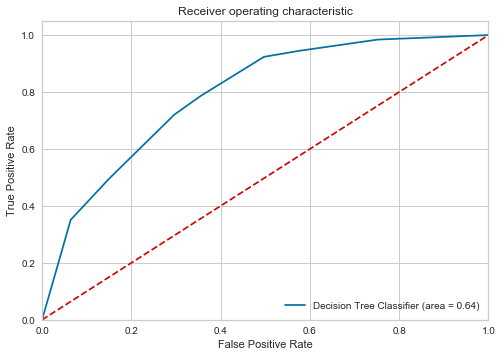

In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gini_roc_auc = roc_auc_score(test_Y, clf_gini.predict(test_X))
fpr, tpr, thresholds = roc_curve(test_Y, clf_gini.predict_proba(test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % gini_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gini_ROC')
plt.show()

# RANDOM FOREST

In [148]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [149]:
predictions = rf.predict(test_X)

In [150]:
from sklearn.tree import export_graphviz
features = list(scaled.drop(columns=['Churn']).columns)
import pydot
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(train_X, train_Y)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

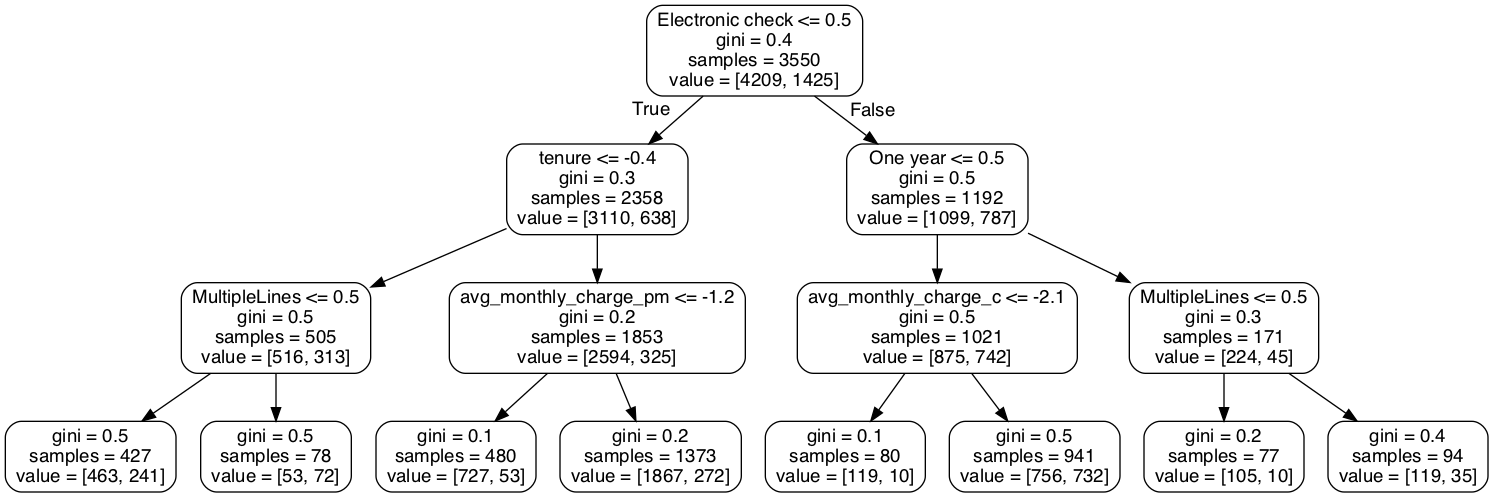

In [151]:
Image('small_tree.png')

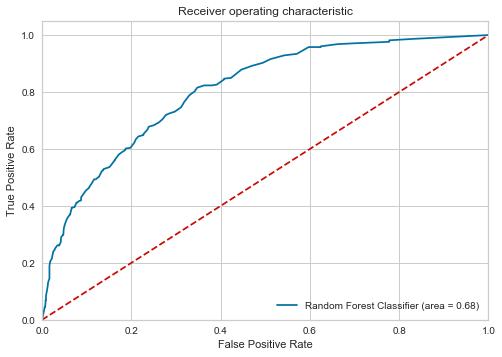

In [152]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(test_Y, rf.predict(test_X))
fpr, tpr, thresholds = roc_curve(test_Y, rf.predict_proba(test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rf_ROC')
plt.show()

# XGBOOST

In [115]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [153]:
D_train = xgb.DMatrix(train_X, label=train_Y)
D_test = xgb.DMatrix(test_X, label=test_Y)

In [154]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [155]:
model = xgb.train(param, D_train, steps)

In [156]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
Y_pred = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in Y_pred])

print("Precision = {}".format(precision_score(test_Y, best_preds, average='macro')))
print("Recall = {}".format(recall_score(test_Y, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(test_Y, best_preds)))

Precision = 0.7501696958162845
Recall = 0.7020416527909419
Accuracy = 0.7984386089425124


# Ensemble

In [47]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [48]:
kfold = StratifiedKFold(n_splits=10)

In [49]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [110]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_osx, y = train_osy, 
                                      scoring = "f1", cv = kfold, n_jobs=-1))

In [111]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [112]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

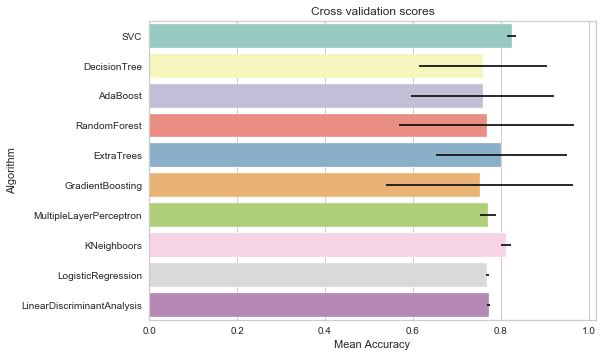

In [113]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [159]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(train_osx,train_osy)

ada_best = gsadaDTC.best_estimator_

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 336 out of 336 | elapsed:    8.9s finished


In [160]:
gsadaDTC.best_score_

0.8011209895632007

In [105]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(train_osx,train_osy)

ExtC_best = gsExtC.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=4)]: Done 162 out of 162 | elapsed:  1.5min finished


In [106]:
gsExtC.best_score_

0.8420950908388094

In [60]:
#changing kfold to 3
kfold = StratifiedKFold(n_splits=3)

In [104]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="f1", n_jobs= -1, verbose = 1)

gsRFC.fit(train_osx,train_osy)

RFC_best = gsRFC.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  2.3min finished


In [63]:
RFC_best

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
rfpreds = gsRFC.predict(test_X)

In [65]:
rf_preds = pd.DataFrame()
#rf_preds['loan_id'] = test_loan_id
rf_preds['Churn'] = rfpreds

In [123]:
rf_preds['Churn'].value_counts()

0    1129
1     280
Name: Churn, dtype: int64

In [107]:
gsRFC.best_score_

0.8071080999560699

In [176]:
clf =GradientBoostingClassifier()
parameters = {
     'min_impurity_decrease':[0.0], 
     'min_impurity_split':[None],
     'min_samples_leaf':[1], 
    'min_samples_split':[2],
    'min_weight_fraction_leaf':[0.0], 'n_estimators':[100,300],
                           'n_iter_no_change':[None], 'presort':['auto'],
                           'subsample':[1.0], 'tol':[0.0001],
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    cv=100,verbose=1)

grid.fit(train_osx, train_osy)

Fitting 100 folds for each of 2 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  5.0min finished


GridSearchCV(cv=100, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_...
             iid='warn', n_jobs=4,
             param_grid={'min_imp

In [177]:
grid.best_score_

0.8540780827212988

# FInal Conclusion

In [ ]:
The variables selected were based on either aggregation that was performed above or were first coverted into numeric values
or taken as dummy variables first. To predict hte churn model we basically targeted the monthly charge that was taken. The basic
way to estimate was by reducing the monthly charge also taking into the consideration the services that were availed by the customer and the 
the contract type.
Our Model can be seen having a good accuracy of   0.854    using Boosting Classifier.
The key factors that make churn are majorly monthly charges and the other services provided which makes utmost sense as 
this no customer would want to pay large amounts of money and avail less servies.
One can only say that the companies should maxmise the services provide along with keeping the monthly charges low.
Based on the accuracy factor it can be safely said that this model is sasfactorily appealing to the customers and hence, 
its rate of success is high.